<a href="https://colab.research.google.com/github/ConorDawson/Conor_Dawson_T00226371_Search_Tree/blob/main/T00226371_Search_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Search Tree Hex Game**
Hex is a two player abstract strategy board game in which players attempt to connect opposite sides of a rhombus-shaped board made of hexagonal cells.It is traditionally played on an 11×11 rhombus board, although 13×13 and 19×19 boards are also popular. The board is composed of hexagons called cells or hexes. Each player is assigned a pair of opposite sides of the board, which they must try to connect by alternately placing a stone of their color onto any empty hex. Once placed, the stones are never moved or removed. A player wins when they successfully connect their sides together through a chain of adjacent stones. Draws are impossible in Hex due to the topology of the game board.



---


***Rules of Hex***


---



* Players take turns placing their pieces on an empty hex.

* One player connects top to bottom (Red), while the other connects left to right (Blue).

* Pieces remain on the board once placed and cannot be moved.

* A player wins by forming an unbroken path of their pieces connecting their assigned sides.

* The swap rule allows the second player to swap colors after the first move for balance (optional and not used in this project as I will be using endgame scenario).



---



# ***Goal of this assingment***


---


The goal is to create a game of Hex that can be played against an AI using the search tree algorithm using the minimax variation to be specific. The AI should block and try to form its own way across the board to maximise its chance to win while minnimising the players chamce to win.


---



# **Logic decided when creating the game.**


---


In Order to apply the search tree algorithm i will use a 6x6 board and create an endgame scenario as when trying to create a full game the branching factor was too big and i was unable to sort out the branch pruning properly so seeing as the full game branching factor was too big i decided to create the endgame board to have 10 moves remaining on the board with both players in a relatively equal position with the abillity to win in 2 moves if not blocked.

This choice was made after many failed attemptds created in the roughwork file led to the generate children leading to resurce timeouts or the AI just always choosing to pick the next open spot, the closest to succesful full game model that was made was one trhat blocked a player one move before they would win but this wonuldnt work in a game like hex as a player ccan still connect the piece down diagonally and win.


---


***Rough Work Notebook:*** https://colab.research.google.com/drive/1k-vLdMC9edieHrxMm-gpuuu6juAdIzVV?usp=sharing


---





---


# **Current Board Class A.K.A. Board logic**


---


This CurrentBoard class implements a Hex game board with the following functionality:



* ***Board Initialization:*** Creates a 6x6 grid filled with '.' (empty spaces). Some predefined moves are added to simulate an ongoing game.

* ***Board Drawing:*** Uses Matplotlib to visualize the board as a hexagonal grid with Red (R) and Blue (B) pieces.

* ***Move Validation:*** Ensures moves are placed on empty hexes and within board boundaries.

* ***Move Handling:*** Allows players to place their pieces (R or B) if the move is valid.

* ***Possible Moves:*** Generates a list of all empty hexes where a move can be made.

* ***Win Detection:*** Uses Depth-First Search (DFS) to check if a player has formed an unbroken path connecting their assigned sides.


---







In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import random

class CurrentBoard:
    def __init__(self, size=6):
        self.size = size
        self.board = [['.' for _ in range(size)] for _ in range(size)]
        self.initialize_board()

    def initialize_board(self):
        predefined_moves = [
            (0, 1, 'B'), (1, 0, 'R'), (1, 2, 'B'), (2, 1, 'R'), (2, 3, 'B'),
            (3, 2, 'R'), (3, 4, 'B'), (4, 3, 'R'), (4, 5, 'B'), (5, 4, 'R'),
            (0, 3, 'B'), (1, 4, 'R'), (2, 5, 'B'), (3, 0, 'R'), (4, 1, 'B'),
            (5, 2, 'R'), (0, 5, 'B'), (1, 1, 'R'), (2, 0, 'B'), (3, 5, 'R'),
            (4, 0, 'B'), (5, 1, 'R'),(0, 2, 'B'), (1, 3, 'R'), (2, 4, 'B'),
            (3, 1, 'R')
        ]
        for row, col, player in predefined_moves:
            self.board[row][col] = player

    def draw_board(self):
        fig, ax = plt.subplots(figsize=(self.size/2, self.size/2))
        ax.set_aspect('equal')
        dx = np.sqrt(3)
        dy = 1.5
        x_coords, y_coords, colors = [], [], []

        for row in range(self.size):
            for col in range(self.size):
                x = col * dx + (row * dx / 2)
                y = -row * dy
                x_coords.append(x)
                y_coords.append(y)
                colors.append(self.get_color(self.board[row][col]))

        ax.scatter(x_coords, y_coords, s=500, marker='h', edgecolors='black', c=colors)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_frame_on(False)

        plt.show(block=False)
        plt.pause(0.1)

    def get_color(self, cell):
        if cell == 'R':
            return 'red'
        elif cell == 'B':
            return 'blue'
        return 'white'

    def is_valid_move(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size and self.board[row][col] == '.'

    def make_move(self, row, col, player):
        if self.is_valid_move(row, col):
            self.board[row][col] = player
            return True
        return False

    def get_possible_moves(self):
        return [(r, c) for r in range(self.size) for c in range(self.size) if self.board[r][c] == '.']

    def check_win(self, player):
        visited = set()

        def dfs(row, col):
            if (row, col) in visited:
                return False
            visited.add((row, col))

            # Check if a Red player reached the last row or a Blue player reached the last column
            if (player == 'R' and row == self.size - 1) or (player == 'B' and col == self.size - 1):
                return True

            # Possible hexagonal neighbors
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
            for dr, dc in directions:
                nr, nc = row + dr, col + dc
                if 0 <= nr < self.size and 0 <= nc < self.size and self.board[nr][nc] == player:
                    if dfs(nr, nc):
                        return True
            return False


        if player == 'R':
            for col in range(self.size):
                if self.board[0][col] == 'R' and dfs(0, col):
                    return True
        else:
            for row in range(self.size):
                if self.board[row][0] == 'B' and dfs(row, 0):
                    return True

        return False




---


# ***Search Tree***


---


This SearchTreeNode class implements a Minimax search tree for AI decision-making in the Hex game.



* ***Tree Node Representation:*** Each node represents a possible board state at a certain depth (ply).

* ***Move Generation:*** The AI expands possible moves, creating child nodes recursively.

* ***Minimax Evaluation:***

   * If it's the AI's turn 'B', it maximizes the score.

   * If it's the player's turn 'R', it minimizes the score.

* ***Win Checking:*** The board is evaluated to determine if the AI  or the player  has won.

* ***Heuristic Scoring:***

    * Rewards AI for placing pieces that form strong paths.

    * Penalizes if the player R builds a good position.

    * Prefers central positions for strategic advantage.

* ***Move Evaluation:*** Uses depth-limited heuristics to approximate the best move without fully solving the game.


---



In [10]:

class SearchTreeNode:
    def __init__(self, board_instance, playing_as, ply=0):
        self.children = []
        self.value_is_assigned = False
        self.ply_depth = ply
        self.current_board = copy.deepcopy(board_instance)
        self.move_for = playing_as
        self.value = self.evaluate_board()

        if self.value is not None:
            self.value_is_assigned = True
        else:
            self.generate_children()

    def min_max_value(self):
        if self.value_is_assigned:
            return self.value

        if self.move_for == 'B':  # AI maximizing
            self.value = max(child.min_max_value() for child in self.children)
        else:  # Player minimizing
            self.value = min(child.min_max_value() for child in self.children)

        self.value_is_assigned = True
        return self.value

    def generate_children(self):
        for move in self.current_board.get_possible_moves():
            new_board = copy.deepcopy(self.current_board)
            new_board.make_move(*move, self.move_for)
            child_node = SearchTreeNode(new_board, self.other_player(self.move_for), ply=self.ply_depth + 1)
            child_node.move = move
            self.children.append(child_node)

    @staticmethod
    def other_player(player):
        return 'R' if player == 'B' else 'B'

    def evaluate_board(self):
        if self.current_board.check_win('B'):  # AI wins
            return 1
        elif self.current_board.check_win('R'):  # Player wins
            return -1
        elif self.ply_depth >= 4:  # Limit depth and apply heuristic
            return self.heuristic_evaluation()
        return None

    def heuristic_evaluation(self):
        b_score = 0
        r_score = 0

        for row in range(self.current_board.size):
            for col in range(self.current_board.size):
                if self.current_board.board[row][col] == 'B':
                    b_score += 1

                    if self.is_part_of_path(row, col, 'B'):
                        b_score += 3

                    if 1 <= row < self.current_board.size - 1 and 1 <= col < self.current_board.size - 1:
                        b_score += 2

                elif self.current_board.board[row][col] == 'R':
                    r_score += 1

                    if self.is_part_of_path(row, col, 'R'):
                        r_score += 3

        return b_score - r_score  # AI (Blue) wants a higher score

    def is_part_of_path(self, row, col, player):
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, 1), (1, -1)]
        for dr, dc in directions:
            nr, nc = row + dr, col + dc
            if 0 <= nr < self.current_board.size and 0 <= nc < self.current_board.size:
                if self.current_board.board[nr][nc] == player:
                    return True
        return False




---


# ***Play Hex***


---


This class manages the game loop for playing Hex against an AI. It handles player input, AI decision-making using Minimax, and win checking.



---



* ***Initialize Board:***

  * A 6x6 Hex board is created using CurrentBoard.

  * The game starts with player Red.

* ***Gameplay Loop:***

  * The board is drawn after every move.

  * The human player enters a move (row & column).

  * If the move is invalid, the player is asked to try again.

* ***AI Decision Process:***

  * A Minimax search tree (SearchTreeNode) is built for AI's turn.

  * The AI evaluates moves and chooses the best move using min_max_value().

  * If the AI has a valid move, it plays as Blue.

* ***Win Checking:***

  * After each move, the game checks if the player or AI has won.

  * If so, the game displays the winner and ends.

  * If no moves are left, it's a draw.



---



In [3]:
class play_Hex:

    def play_game():
        board = CurrentBoard(size=6)
        player = 'R'
        while True:
            board.draw_board()
            row, col = map(int, input("Enter row and col (e.g., 0 1): ").split())
            if not board.make_move(row, col, player):
                print("Invalid move! Try again.")
                continue

            print("AI is thinking...")
            tree = SearchTreeNode(board, SearchTreeNode.other_player(player))
            tree.generate_children()
            best_child = max(tree.children, key=lambda child: child.min_max_value()) if tree.children else None
            best_move = best_child.move if best_child else None



            if board.check_win(player):
              board.draw_board()
              print(f"Player {player} wins!")
              break

            if best_move:
                board.make_move(*best_move, SearchTreeNode.other_player(player))

                if board.check_win(SearchTreeNode.other_player(player)):
                    board.draw_board()
                    print(f"AI ({SearchTreeNode.other_player(player)}) wins!")
                    break
            else:
                print("It's a draw!")
                break





---


# ***Call Game Logic***


---


This calls the play_Game() in order to actually play the game against the AI

To make a move you eneter the row and cloumn number of where you wish to place the hex cell i.e. (0 0) or (5 4)

Youre playing as red and the AI is playing as blue


---



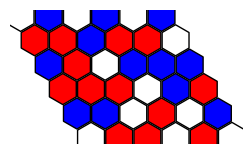

Enter row and col (e.g., 0 1): 0 2
AI is thinking...


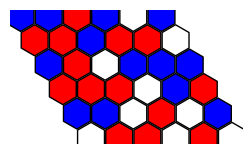

KeyboardInterrupt: Interrupted by user

In [ ]:
play_Hex.play_game()



---


# ***Generate The Board***


---


This generates a board and assigns it to the value of cb


---



In [4]:
cb = CurrentBoard()



---


# ***Showing The Board***


---


In order to see the board we just generated in cb the function drawboard is called which use matplot to show the board which is generated in Current_Board and shows the endgame board that is created.


---



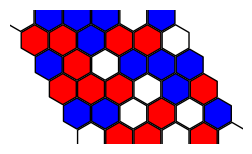

In [5]:
cb.draw_board()



---


# ***Generating Children***


---


This initializes a search tree for a Hex game board and prints the first-level child nodes, showing all possible moves Red can make from the current board state.


---



* Generates all possible first moves for red.
* Creates child nodes representing these moves.
* Displays each resulting board state using Matplotlib



---



Child 0: Move made resulted in the board:


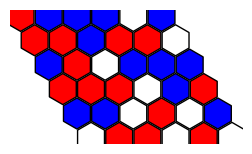

Child 1: Move made resulted in the board:


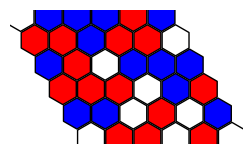

Child 2: Move made resulted in the board:


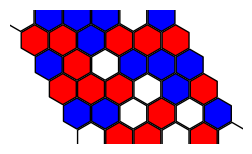

Child 3: Move made resulted in the board:


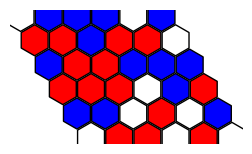

Child 4: Move made resulted in the board:


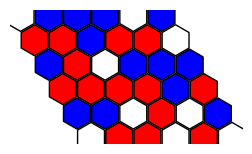

Child 5: Move made resulted in the board:


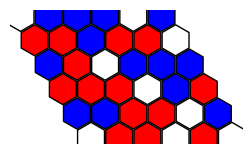

Child 6: Move made resulted in the board:


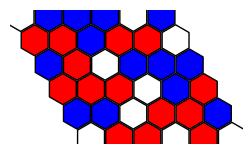

Child 7: Move made resulted in the board:


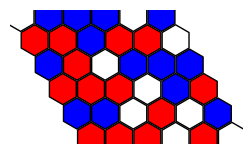

Child 8: Move made resulted in the board:


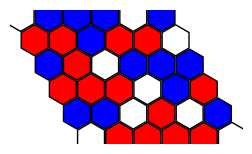

Child 9: Move made resulted in the board:


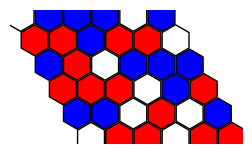

In [12]:
root = SearchTreeNode(cb, 'R')

# Print the first-level children moves
for i, child in enumerate(root.children):
    print(f"Child {i}: Move made resulted in the board:")
    child.current_board.draw_board()




---


This function recursively prints the game tree, displaying board states up to a
maximum depth (default: 2 levels). It helps visualize how the game evolves as moves are made.


---


* Recursively explores the game tree up to a set depth.
* Prints board states at each level.
* Organizes output using indentation for readability


---


Level 0 - Move made resulted in the board:


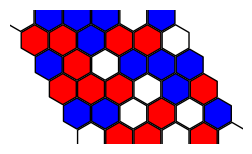

  Child 0:
  Level 1 - Move made resulted in the board:


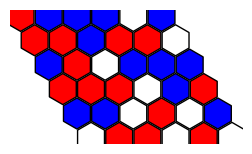

    Child 0:
    Level 2 - Move made resulted in the board:


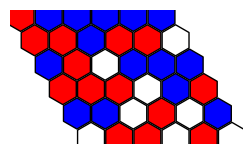

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


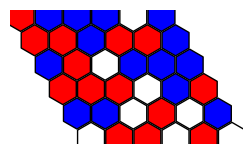

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


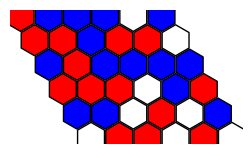

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


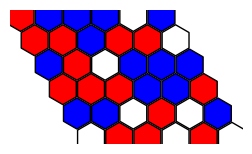

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


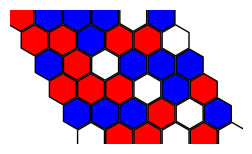

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


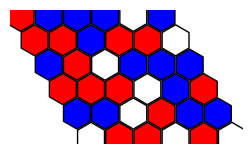

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


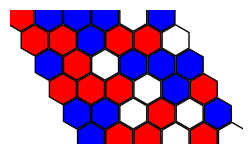

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


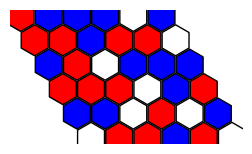

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


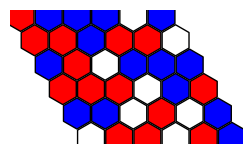

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 1:
  Level 1 - Move made resulted in the board:


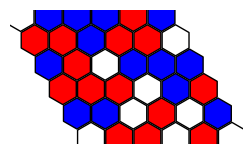

    Child 0:
    Level 2 - Move made resulted in the board:


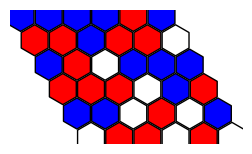

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


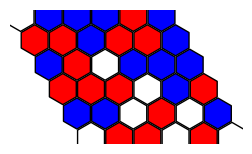

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


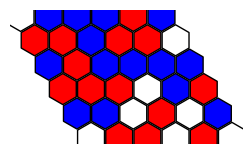

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


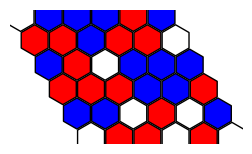

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


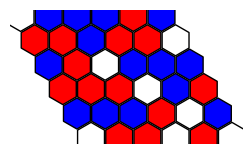

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


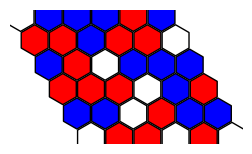

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


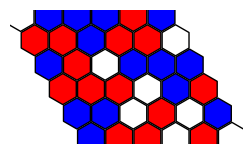

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


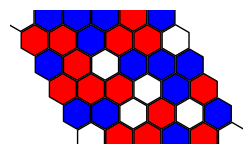

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


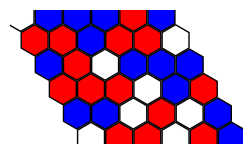

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 2:
  Level 1 - Move made resulted in the board:


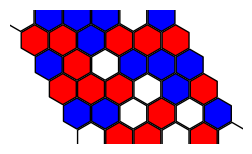

    Child 0:
    Level 2 - Move made resulted in the board:


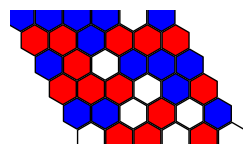

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


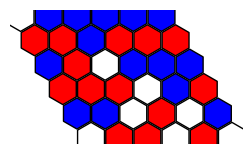

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


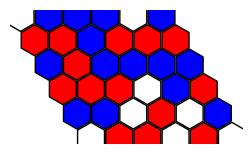

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


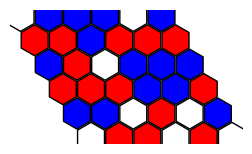

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


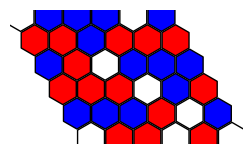

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


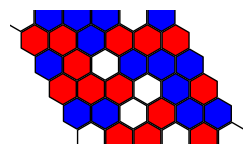

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


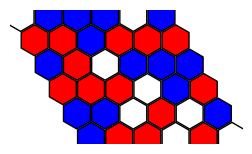

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


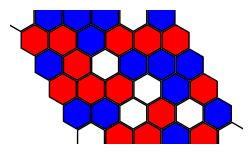

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


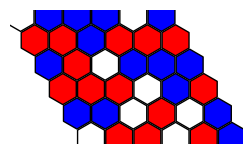

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 3:
  Level 1 - Move made resulted in the board:


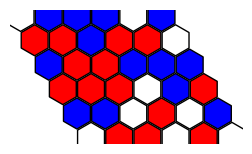

    Child 0:
    Level 2 - Move made resulted in the board:


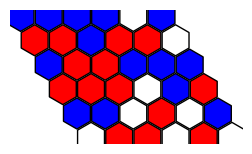

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


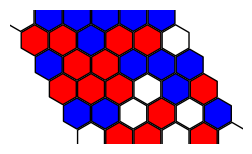

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


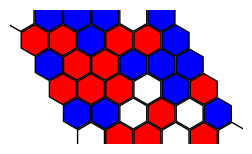

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


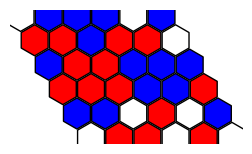

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


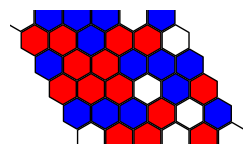

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


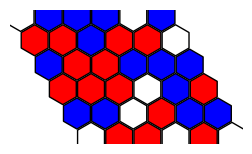

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


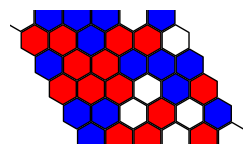

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


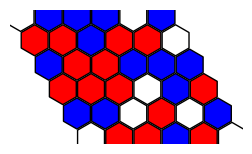

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


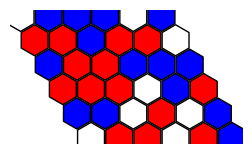

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 4:
  Level 1 - Move made resulted in the board:


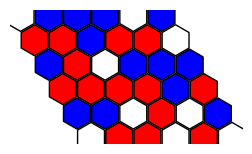

    Child 0:
    Level 2 - Move made resulted in the board:


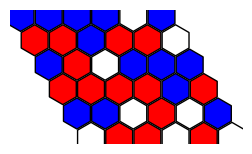

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


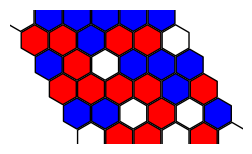

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


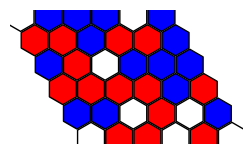

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


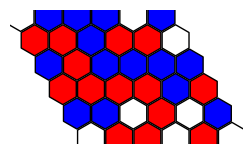

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


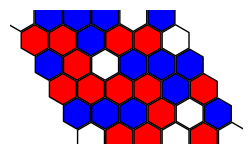

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


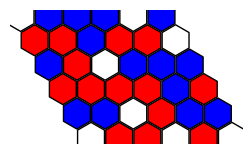

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


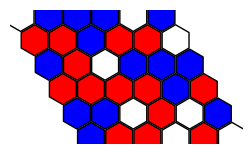

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


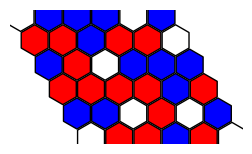

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


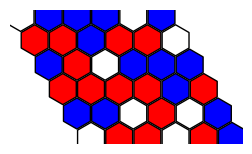

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 5:
  Level 1 - Move made resulted in the board:


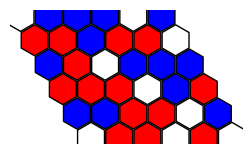

    Child 0:
    Level 2 - Move made resulted in the board:


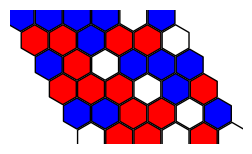

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


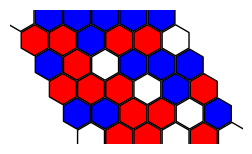

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


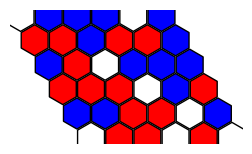

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


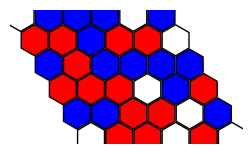

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


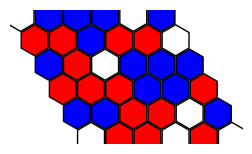

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


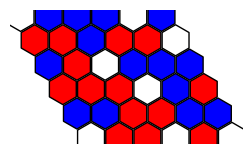

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


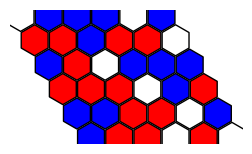

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


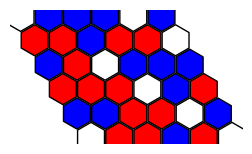

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


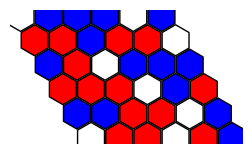

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 6:
  Level 1 - Move made resulted in the board:


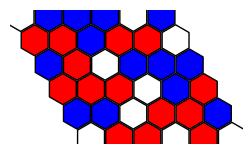

    Child 0:
    Level 2 - Move made resulted in the board:


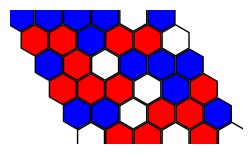

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


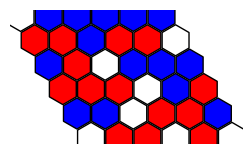

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


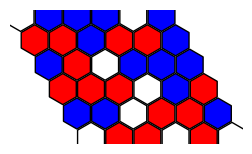

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


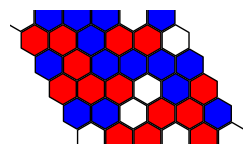

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


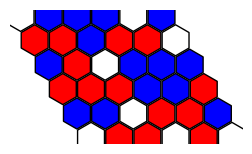

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


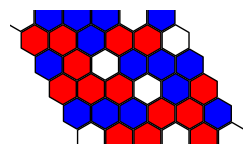

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


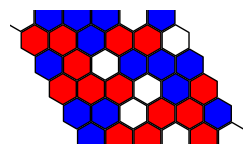

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


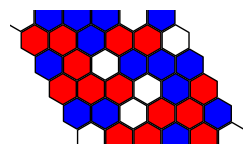

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


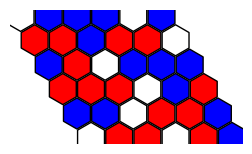

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 7:
  Level 1 - Move made resulted in the board:


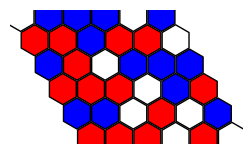

    Child 0:
    Level 2 - Move made resulted in the board:


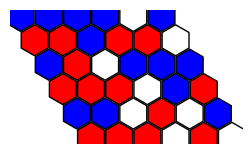

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


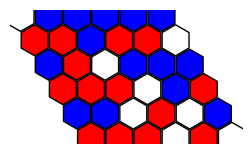

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


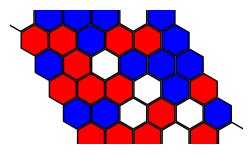

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


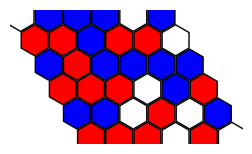

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


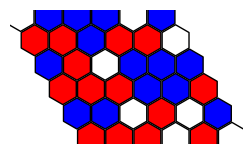

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


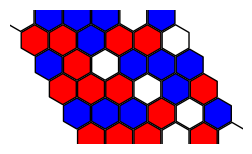

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


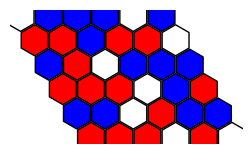

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


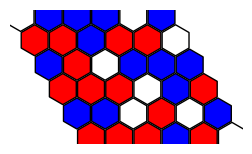

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


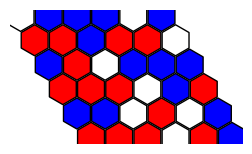

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 8:
  Level 1 - Move made resulted in the board:


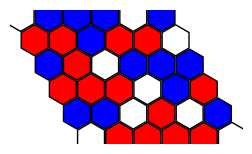

    Child 0:
    Level 2 - Move made resulted in the board:


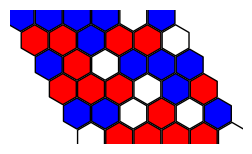

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


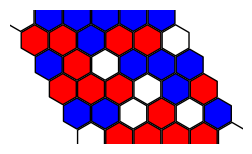

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


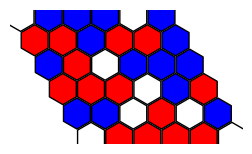

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


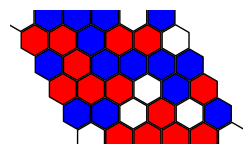

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


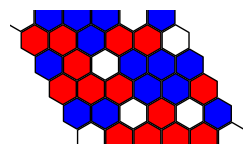

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


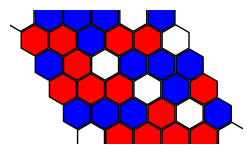

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


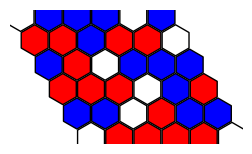

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


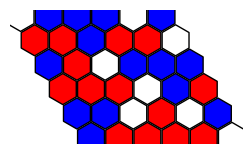

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


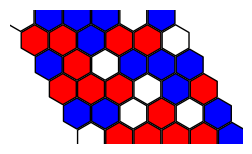

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
  Child 9:
  Level 1 - Move made resulted in the board:


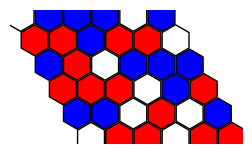

    Child 0:
    Level 2 - Move made resulted in the board:


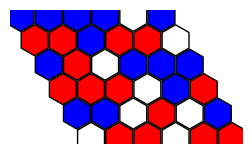

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 1:
    Level 2 - Move made resulted in the board:


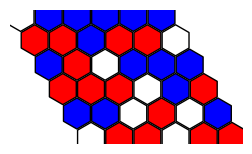

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 2:
    Level 2 - Move made resulted in the board:


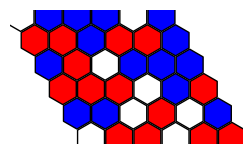

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 3:
    Level 2 - Move made resulted in the board:


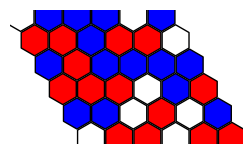

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 4:
    Level 2 - Move made resulted in the board:


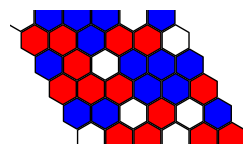

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 5:
    Level 2 - Move made resulted in the board:


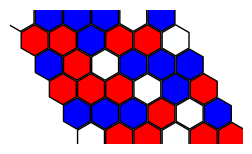

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 6:
    Level 2 - Move made resulted in the board:


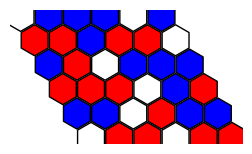

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 7:
    Level 2 - Move made resulted in the board:


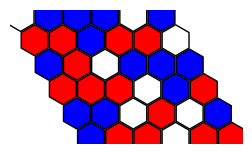

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:
    Child 8:
    Level 2 - Move made resulted in the board:


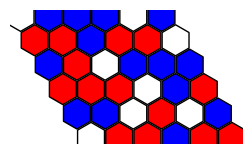

      Child 0:
      Child 1:
      Child 2:
      Child 3:
      Child 4:
      Child 5:
      Child 6:
      Child 7:


In [15]:
def print_children(node, level=0, max_level=2):
    if level > max_level:
        return

    print("  " * level + f"Level {level} - Move made resulted in the board:")
    node.current_board.draw_board()

    for i, child in enumerate(node.children):
        print("  " * (level + 1) + f"Child {i}:")
        print_children(child, level + 1, max_level)

# Print up to 2 levels
print_children(root, max_level=2)




---


# ***Min Max***


---


Triggers the Minimax algorithm, which calculates the best possible move for the AI by evaluating the game tree.


---


* Minimax algorithm evaluates the best possible move.
* Recursively calculates the optimal path for AI.
* Ensures AI makes the best possible decision in the game.


---



In [17]:
root.min_max_value()

-1





---



The -1 is determining that the Ai is evauating that the human player or Red should always win.

---








# ***Conclusion***


---


After many failed attempts and different approaches the AI can finally play hex on an endgame board. This version can generate the children and play a good game against the player now and the AI gives a tough challenge in order to try and beat the player.` The evaluation encourages blocking while making solid connections across the board.

If this project was to be done again I think an alternative algorithm of the Search Tree variant such as the Monte Carlo variant would suit the project better. The biggest issue which I wasnt able to overcome properly was the massive full game branching factor and the ability to prune them properly.

While a work around for the project was found to meet the brief the full game is still possible juyst not in my own abilities to understand the SearchTree as it currently stands.


---

